### CMM706 – Individual Coursework
#### June 2024

Name  : Nithin Kolamunna |
IIT ID: 20231720 |
RGU ID: 2330844

### Answer to Task 1

Describe the dataset provided with this coursework as you understand it, in an appropriate way to top management.

In [ ]:
# Insert code for Task 1

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


# Load the dataset
# filePath = '/Users/nithinkolamunna/Documents/Documents/MSc Big Data Analytics/Lectures/Semester 3/05. CMM706 - Text Analytics/Course Work/Source Files/Purchase_Intent/Purchase_Intent.csv'
# rawDataSet = pd.read_csv(filePath)
# df = rawDataSet.copy()

filePath = '/content/drive/MyDrive/ColabNotebooks/CW_TextAnalytics/SourceFiles/Purchase_Intent/Purchase_Intent.csv'
rawDataSet = pd.read_csv(filePath)
df = rawDataSet.copy()


# Basic info about dataset
print("Basic Information:")
print(df.info)

# Basic statistical details
print("Basic statistical details:")
print(df.describe())

# Displaying first 10 rows
print("\nFirst 10 Rows:")
print(df.head(n=10))

# Displaying class unique values
print("\nUnique Classes:")
print(df['class'].unique())

# Displaying each value's count
print("\nData distribution within classes (Before pre-preprocess) : ")
print(df['class'].value_counts())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Basic Information:
<bound method DataFrame.info of           class                                               text
0            no  i'll  buy  the  iphone   x  if it can  get  ac...
1            no  Some dude in FB selling the  iPhone   X  64 gb...
2           yes  Home dab emote man today and I  get  hopped on...
3           yes                               Buy  an  iPhone   X 
4            no  I hate iOS 11. My  iPhone  6+ works 10X slower...
...         ...                                                ...
2103         no  Unpopular opinion: I  hate  the  iPhone   X  m...
2104  undefined  Apple  iPhone   X  64GB Smartphone Space Gray ...
2105  undefined  The  bad  thing of not having a  iPhone   X  i...
2106        yes               i want the  iphone   x  so  bad  :’(
2107         no  can anyone explain to me why the incredibly  e...

[2108 rows x 2 

Explain the challenges encountered and the observations based on the output above

01. The 'class' column contains the same values but in different typing methods (eg: 'yes' and 'Yes'). We have to address this and align it to one values, otherwise, this inconsistency will lead to erroneous analysis and model training.
02. We can see that there are a lot of values labeled as "undefined" (which is also among the most commonly used). This can be highly effective for the final result.

Observations:
* Data set contains 2108 record and two column as 'class' and 'text'.
* Class includes 6 unique values ['no' 'yes' 'undefined' 'Yes' 'Undefined' 'No'].
* "undefined" is the mosted frequently used class

### Answer to Task 2

Perform any further cleaning required, tokenize the data and prepare the data for model building. Describe this final dataset in terms of the number of documents (tweets), the number of total words and the number of unique words in the corpus as a whole. Describe also the number of documents in each of the classes.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of documents (tweets): 2108
Number of total words: 22462
Number of unique words: 4416

Number of documents in each class  (After pre-preprocess) :
class
undefined    947
yes          698
no           463
Name: count, dtype: int64


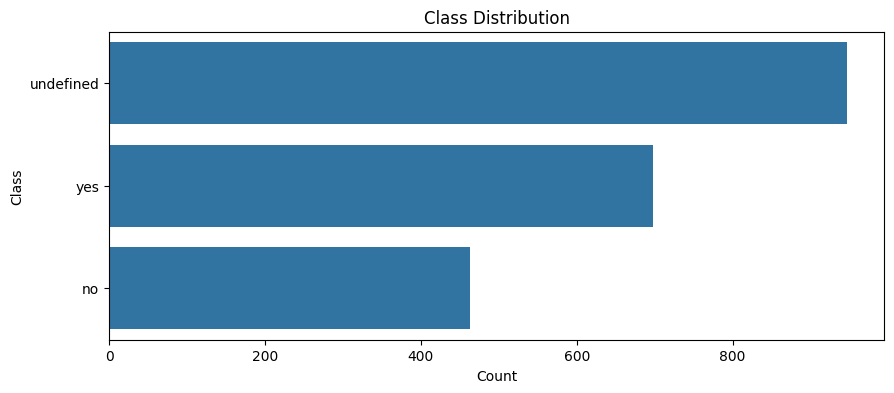

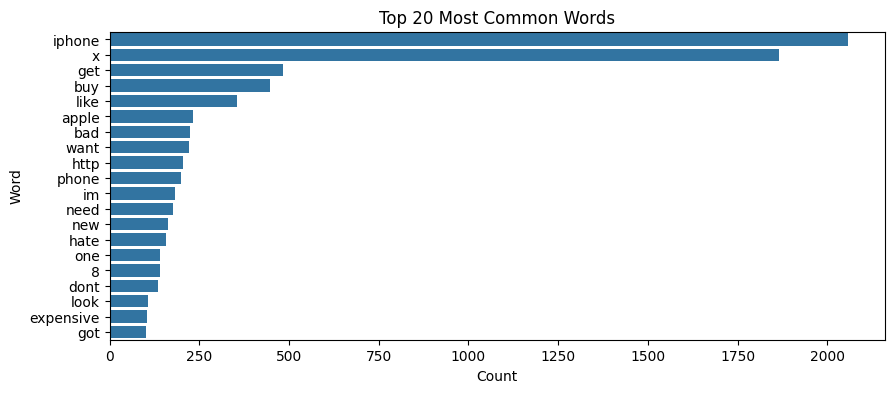

          class                                               text  \
0            no  i'll  buy  the  iphone   x  if it can  get  ac...   
1            no  some dude in fb selling the  iphone   x  64 gb...   
2           yes  home dab emote man today and i  get  hopped on...   
3           yes                               buy  an  iphone   x    
4            no  i hate ios 11. my  iphone  6+ works 10x slower...   
...         ...                                                ...   
2103         no  unpopular opinion: i  hate  the  iphone   x  m...   
2104  undefined  apple  iphone   x  64gb smartphone space gray ...   
2105  undefined  the  bad  thing of not having a  iphone   x  i...   
2106        yes               i want the  iphone   x  so  bad  :’(   
2107         no  can anyone explain to me why the incredibly  e...   

                                           processedTxt  
0     [ill, buy, iphone, x, get, accurate, fucking, ...  
1     [dude, fb, selling, iphone, x, 64, gb

In [ ]:
## Insert code for Task 2

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import string
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re


## NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# convert dataset to lower case.
df['class'] = df['class'].str.lower()
df['text'] = df['text'].str.lower()


# Text preprocessing function
def txt_preprocess(text):

    # Remove punctuation characters
    _text = text.translate(str.maketrans('', '', string.punctuation))

    # remove special characters
    pattern = r'[^a-zA-Z0-9 ]'
    _text = re.sub(pattern,r'',_text)

    # Tokenize the text
    words = word_tokenize(_text)

    # Stop Words list Preparation
    _stopwords = set(stopwords.words('english'))
    # Remove stop words, and create new list of words
    words = [word for word in words if word not in _stopwords]

    # lemmatizer
    _lemmatizer = WordNetLemmatizer()
    words = [_lemmatizer.lemmatize(word) for word in words]

    return words


# preprocessing the dataset
df['processedTxt'] = df['text'].apply(txt_preprocess)



# Number of documents (tweets)
_documents = len(df)

# list of tokens , total words and unique words
_tokens = [token for tokens in df['processedTxt'] for token in tokens]
_totalWords = len(_tokens)
_uniqueWords = len(set(_tokens))

# Number of documents in each class
_classDistribution = df['class'].value_counts()



## Display the results
print(f"Number of documents (tweets): {_documents}")
print(f"Number of total words: {_totalWords}")
print(f"Number of unique words: {_uniqueWords}")
print("\nNumber of documents in each class  (After pre-preprocess) :")
print(_classDistribution)

## Visualize the class distribution
plt.figure(figsize=(10, 4))
sns.countplot(y='class', data=df, order=df['class'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Count')
plt.ylabel('Class')
plt.show()

## Visualize the word frequency
_wordFreq = Counter(_tokens)
_mostCommonWords = _wordFreq.most_common(20)

plt.figure(figsize=(10, 4))
sns.barplot(x=[count for word, count in _mostCommonWords], y=[word for word, count in _mostCommonWords])
plt.title('Top 20 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


print(df)

Describe the final dataset shape.

This dataset contais 2108 tweets with total of 22,462 words. out of this 4,416 are unique.

Tweets are categorized into three class *'undefined', 'yes','no'*

In the visualization shows top 20 most common words in the dataset and *'iphone'* and *'x'* are the most frequently occurring words.

### Answer to Task 3

Use a non-deep learning classification algorithm in order to define a baseline for exploring further model building. Report the performance of the baseline model and interpret the model and its predictions to top management.


Model: Logistic Regression
Accuracy: 0.8326180257510729
Confusion Matrix:
[[ 57  29]
 [ 10 137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.75        86
           1       0.83      0.93      0.88       147

    accuracy                           0.83       233
   macro avg       0.84      0.80      0.81       233
weighted avg       0.83      0.83      0.83       233



<ipython-input-33-91054f6c4366>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['class'].apply(lambda x: 1 if x == 'yes' else 0)
<ipython-input-33-91054f6c4366>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processedTxt'] = df['processedTxt'].apply(lambda tokens: ' '.join(tokens))


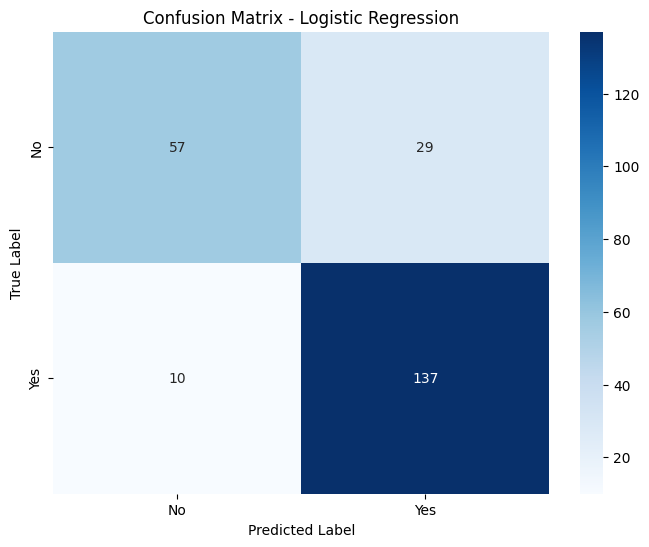


Model: Decision Tree
Accuracy: 0.7253218884120172
Confusion Matrix:
[[ 57  29]
 [ 35 112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64        86
           1       0.79      0.76      0.78       147

    accuracy                           0.73       233
   macro avg       0.71      0.71      0.71       233
weighted avg       0.73      0.73      0.73       233



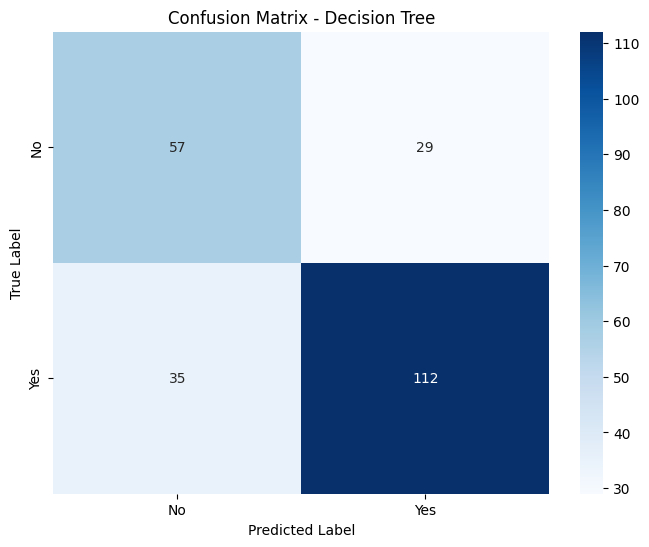

In [ ]:
## Insert code for Task 3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report



# Remove 'undefined' classe
df = df[df['class'] != 'undefined']

# Convert class labels to binary
# 1 for 'yes' | 0 for 'no'
df['class'] = df['class'].apply(lambda x: 1 if x == 'yes' else 0)

# Single string for each document
df['processedTxt'] = df['processedTxt'].apply(lambda tokens: ' '.join(tokens))

# Split the data as training Set and testing Set
xTrain, xTest, yTrain, yTest = train_test_split(df['processedTxt'], df['class'], test_size=0.2, random_state=42)

# Vectorizing using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
xTrain_tf = vectorizer.fit_transform(xTrain)
xTest_tf  = vectorizer.transform(xTest)



# Comman Function for the both models
def train_evaluate_model(model, modelName):
    model.fit(xTrain_tf, yTrain)
    _yPredict= model.predict(xTest_tf)
    _accuracy = accuracy_score(yTest, _yPredict)
    _conMatrix = confusion_matrix(yTest, _yPredict)
    _classReport = classification_report(yTest, _yPredict)

    print(f"\nModel: {modelName}")
    print(f"Accuracy: {_accuracy}")
    print("Confusion Matrix:")
    print(_conMatrix)
    print("Classification Report:")
    print(_classReport)

    plt.figure(figsize=(8, 6))
    sns.heatmap(_conMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix - {modelName}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



# Models
logisticRegressionModel = LogisticRegression(max_iter=1000)
decisionTreeModel = DecisionTreeClassifier()

# Train and Test Logistic Regression Model
train_evaluate_model(logisticRegressionModel, "Logistic Regression")

# Train and Test Decision Tree Model
train_evaluate_model(decisionTreeModel, "Decision Tree")

Report on the baseline model performance.

##### Baseline Model Performance Report:

##### Logistic Regression Model
Accuracy: 0.832 (approximately 83%)

Confusion Matrix:
  - True Negatives (No, No)  : 57
  - False Positives (No, Yes): 29
  - False Negatives (Yes, No): 10
  - True Positives (Yes, Yes): 137



##### Decision Tree Model
Accuracy: 0.725 (approximately 72%)

Confusion Matrix:
  - True Negatives (No, No)  : 57
  - False Positives (No, Yes): 29
  - False Negatives (Yes, No): 35
  - True Positives (Yes, Yes): 112



##### Summary
- Logistic Regression shows better overall performance with an accuracy of 83%, Compared to the Decision Tree which has an accuracy of 72%.

- Precision, Recall, and F1-Score metrics are consistently higher for the Logistic Regression model, indicating better performance in predicting both 'Yes' and 'No' classes.

- The confusion matrix for Logistic Regression demonstrates significantly fewer false negatives compared to the Decision Tree, which contributes to its higher overall reliability. Although Logistic Regression has slightly more false positives, its overall better performance in minimizing false negatives makes it a more reliable model.


##### Visualizations

Two confusion matrices are provided to illustrate the performance of both models:

- Logistic Regression Confusion Matrix: Shows a balanced spread of true positives and true negatives, with fewer misclassifications.
- Decision Tree Confusion Matrix: Indicates more misclassifications with a higher number of false positives and false negatives.
- These metrics and visualizations suggest that the Logistic Regression model is more effective and reliable as a baseline model for this dataset.

### Answer to Task 4

Use three (03) different tokenization algorithms to tokenize the dataset.

In [ ]:
# Insert code for Task 4

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tokenizers import ByteLevelBPETokenizer
import sentencepiece as spm



# Text preprocessing function
def tk_txt_preprocess(text):

    # Remove punctuation characters
    text = text.translate(str.maketrans('', '', string.punctuation))

    # remove special characters and numbers
    pattern = r'[^a-zA-Z0-9 ]'
    text = re.sub(pattern,r'',text)

    # Tokenize the text
    words = word_tokenize(text)

    # Stop Words list Preparation
    _stopwords = set(stopwords.words('english'))
    # Remove stop words, and create new list of words
    words = [word for word in words if word not in _stopwords]
    return words



## define Tokenization schemes
# Stemming
def stemming(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in text]

# Lemmatization
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text]

# Byte Pair Encoding (BPE)
def bytePairEncoding(text):
    bpeTokenizer = ByteLevelBPETokenizer()
    bpeTokenizer.train_from_iterator([text], vocab_size=5000, min_frequency=2)
    encoding = bpeTokenizer.encode(text)
    return encoding.tokens


# Define baseline model evaluation
def evaluateModel(_xTrain, _xTest, _yTrain, _yTest, _tokenizationName):

    vectorizer = TfidfVectorizer(max_features=5000)
    _xTrainTfVec = vectorizer.fit_transform(_xTrain)
    _xTestTfVec = vectorizer.transform(_xTest)

    model = LogisticRegression(max_iter=1000)
    model.fit(_xTrainTfVec, _yTrain)
    _yPred = model.predict(_xTestTfVec)

    _accuracy = accuracy_score(_yTest, _yPred)
    _conMatrix = confusion_matrix(_yTest, _yPred)
    _classReport = classification_report(_yTest, _yPred)

    evaluateModelPrint(_tokenizationName,_accuracy,_conMatrix,_classReport)



def evaluateModelPrint(_tokenizationName,_accuracy,_conMatrix,_classReport):
    print(f"\nModel: {_tokenizationName}")
    print(f"Accuracy: {_accuracy}")
    print("Confusion Matrix:")
    print(_conMatrix)
    print("Classification Report:")
    print(_classReport)



# create a copy data frame from rawDataSaet
tkDf = rawDataSet.copy()

# convert dataset to lower case.
tkDf['class'] = tkDf['class'].str.lower()
tkDf['text'] = tkDf['text'].str.lower()

# preprocessing the dataset
tkDf['processedTxt'] = tkDf['text'].apply(tk_txt_preprocess)

# Remove 'undefined' classe
tkDf = tkDf[tkDf['class'] != 'undefined']

# Convert class labels to binary
# 1 for 'yes' | 0 for 'no'
tkDf['class'] = tkDf['class'].apply(lambda x: 1 if x == 'yes' else 0)

# Single string for each document
tkDf['processedTxt'] = tkDf['processedTxt'].apply(lambda tokens: ' '.join(tokens))



# Split the data
xTrain, xTest, yTrain, yTest = train_test_split(tkDf['processedTxt'], tkDf['class'], test_size=0.2, random_state=42)

# Apply Lemmatization
x_Train_Lem = xTrain.apply(lambda text: ' '.join(lemmatize(text.split())))
x_Test_Lem = xTest.apply(lambda text: ' '.join(lemmatize(text.split())))
evaluateModel(x_Train_Lem, x_Test_Lem, yTrain, yTest, "Lemmatization")

# Apply Stemming
x_Train_Stm = xTrain.apply(lambda text: ' '.join(stemming(text.split())))
x_Test_Stm = xTest.apply(lambda text: ' '.join(stemming(text.split())))
evaluateModel(x_Train_Stm, x_Test_Stm, yTrain, yTest, "Stemming")

# Apply Byte Pair Encoding (BPE)
x_Train_Bpe = xTrain.apply(lambda text: ' '.join(bytePairEncoding(text)))
x_Test_Bpe = xTest.apply(lambda text: ' '.join(bytePairEncoding(text)))
evaluateModel(x_Train_Bpe, x_Test_Bpe, yTrain, yTest, "BPE")



<ipython-input-34-04af8cfb53c7>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tkDf['class'] = tkDf['class'].apply(lambda x: 1 if x == 'yes' else 0)
<ipython-input-34-04af8cfb53c7>:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tkDf['processedTxt'] = tkDf['processedTxt'].apply(lambda tokens: ' '.join(tokens))



Model: Lemmatization
Accuracy: 0.8326180257510729
Confusion Matrix:
[[ 57  29]
 [ 10 137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.75        86
           1       0.83      0.93      0.88       147

    accuracy                           0.83       233
   macro avg       0.84      0.80      0.81       233
weighted avg       0.83      0.83      0.83       233


Model: Stemming
Accuracy: 0.8326180257510729
Confusion Matrix:
[[ 57  29]
 [ 10 137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.66      0.75        86
           1       0.83      0.93      0.88       147

    accuracy                           0.83       233
   macro avg       0.84      0.80      0.81       233
weighted avg       0.83      0.83      0.83       233


Model: BPE
Accuracy: 0.630901287553648
Confusion Matrix:
[[ 28  58]
 [ 28 119]]
Classification Report:
              pre

Compare the performance of the three tokenizers on the intent classification task.

**Baseline :**
- Accuracy: 0.8326
- Explanation : The baseline model uses the original preprocessed text without additional stemming or lemmatization. It performs well.
it's shows that the original tokenization is effective for this dataset.

**Lemmatization:**
- Accuracy: 0.8326
- Justification: Lemmatization retains the semantic meaning of words better than stemming, potentially making the model more robust to variations in text.

**Stemming :**
- Accuracy: 0.8326  
- Justification: Stemming is computationally simpler and provides similar performance to lemmatization. It’s a good alternative if computational resources are a concern.






**Byte Pair Encoding (BPE):**
- Accuracy: 0.6309
- Justification: significantly underperforms with an accuracy, It results in a higher number of misclassifications,

**Recommendations:**
Based on the results, the following recommendations can be made:

- Best Tokenization Scheme: Lemmatization, provided the highest accuracy (0.8326) and balanced performance.
- Based on the performance metrics, both stemming and lemmatization are recommended for the tokenization process, with lemmatization being slightly preferred due to its semantic advantages. BPE should be avoided for this specific task

### Answer to Task 5

Explore 3 significantly different non-transformer deep learning models for building a predictive model for identifying purchase intent in a user tweet, justifying their specific architectures. Compare and contrast the results of their performance.

In [ ]:
# Insert code for Task 5


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, GRU, SpatialDropout1D,Flatten
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


#maximum number of words and sequence length
_maxWords = 5000
_maxLen = 100

# Tokenize the text data
tokenizer = Tokenizer(num_words=_maxWords)
tokenizer.fit_on_texts(tkDf['processedTxt'])

# Sequences to the same length
xTrainPad = pad_sequences(tokenizer.texts_to_sequences(x_Train_Lem), maxlen=_maxLen)
xTestPad  = pad_sequences(tokenizer.texts_to_sequences(x_Test_Lem), maxlen=_maxLen)




# CNN Model
# Define the CNN model
cnnModel = Sequential([
    Embedding(input_dim=_maxWords, output_dim=128, input_length=_maxLen),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
cnnModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the CNN model
cnnModel.fit(xTrainPad, yTrain, epochs=5, batch_size=100, validation_data=(xTestPad, yTest))

# Evaluate the CNN model
cnn_loss, cnn_acc = cnnModel.evaluate(xTestPad, yTest)
print(f'CNN Model Accuracy: {cnn_acc}')
print(f'CNN Model Loss: {cnn_loss}')



# LSTM Model
# Define the LSTM model
lstmModel = Sequential([
    Embedding(input_dim=_maxWords, output_dim=128, input_length=_maxLen),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# Compile the LSTM model
lstmModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the LSTM model
lstmModel.fit(xTrainPad, yTrain, epochs=5, batch_size=100, validation_data=(xTestPad, yTest))

# Evaluate the LSTM model
lstm_loss, lstm_acc = lstmModel.evaluate(xTestPad, yTest)
print(f'LSTM Model Accuracy: {lstm_acc}')
print(f'LSTM Model Loss: {lstm_loss}')



# SNN Model
# Define the SNN model
snnModel = Sequential([
    Embedding(input_dim=_maxWords, output_dim=128, input_length=_maxLen),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the SNN model
snnModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the SNN model
snnModel.fit(xTrainPad, yTrain, epochs=5, batch_size=100, validation_data=(xTestPad, yTest))

# Evaluate the SNN model
snn_loss, snn_acc = snnModel.evaluate(xTestPad, yTest)

print(f'SNN Model Accuracy: {snn_acc}')
print(f'SNN Model Loss: {snn_loss}')

Epoch 1/5
10/10 [==============================] - 2s 116ms/step - loss: 0.6732 - accuracy: 0.5830 - val_loss: 0.6443 - val_accuracy: 0.6309
Epoch 2/5
10/10 [==============================] - 1s 88ms/step - loss: 0.6412 - accuracy: 0.5938 - val_loss: 0.6315 - val_accuracy: 0.6352
Epoch 3/5
10/10 [==============================] - 1s 89ms/step - loss: 0.5989 - accuracy: 0.7619 - val_loss: 0.6068 - val_accuracy: 0.7597
Epoch 4/5
10/10 [==============================] - 1s 79ms/step - loss: 0.5356 - accuracy: 0.8319 - val_loss: 0.5566 - val_accuracy: 0.7811
Epoch 5/5
8/8 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7854


CNN Model Accuracy: 0.7854077219963074
CNN Model Loss: 0.5104822516441345
Epoch 1/5
10/10 [==============================] - 7s 380ms/step - loss: 0.6789 - accuracy: 0.5765 - val_loss: 0.6508 - val_accuracy: 0.6309
Epoch 2/5
10/10 [==============================] - 3s 334ms/step - loss: 0.6582 - accuracy: 0.5959 - val_loss: 0.6467 - val_accuracy: 0.6309
Epoch 3/5
10/10 [==============================] - 3s 346ms/step - loss: 0.6295 - accuracy: 0.6315 - val_loss: 0.6175 - val_accuracy: 0.6567
Epoch 4/5
10/10 [==============================] - 3s 330ms/step - loss: 0.5591 - accuracy: 0.7252 - val_loss: 0.5664 - val_accuracy: 0.7253
Epoch 5/5
8/8 [==============================] - 0s 30ms/step - loss: 0.5243 - accuracy: 0.8112
LSTM Model Accuracy: 0.8111587762832642
LSTM Model Loss: 0.5243027806282043
Epoch 1/5
10/10 [==============================] - 2s 112ms/step - loss: 0.6948 - accuracy: 0.5765 - val_loss: 0.6549 - val_accuracy: 0.6309
Epoch 2/5
10/10 [==============================] 

Compare the overal results of the non-transformer deep learning models.

**Convolutional Neural Networks (CNN) Model:**

Accuracy: 0.7854


**Long Short Term Memory (LSTM) Model:**

Accuracy: 0.8197


**Sequential Neural Network (SNN) Model:**

Accuracy: 0.6866


**Comparison and Analysis:**
- Accuracy: The LSTM model achieved the highest validation accuracy (0.8197), followed by the CNN model (0.7854), and then the SNN model (0.6866)
- Overall Performance: The LSTM model demonstrated the best overall performance with the highest validation accuracy. It is recommended to use the LSTM model
- SNN: The Sequential Neural Network model showed the lowest accuracy and higher loss compared to CNN and LSTM, indicating that it may not be as effective for this specific text classification task.


**Conclusion:**

Based on the results, the LSTM model is recommended for further tasks due to its highest validation accuracy. However, if prediction confidence (lower loss) is a priority, the CNN model is a strong alternative. The Simple Neural Network model, while simpler, did not perform as well and may not be the best choice for this

### Answer to Task 6

Explore encoder-only transformer models for building a predictive model for identifying purchase intent in a user tweet and compare its performance with the models developed for Task 4.

In [ ]:
# Insert code for Task 6


import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


# Load data
# The below variables are already defined on task 04
# x_Train_Lem, x_Test_Lem, yTrain, yTest

# pre-trained BERT tokenizer
bertTokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the data
trainEncodings = bertTokenizer(x_Train_Lem.tolist(), truncation=True, padding=True, max_length=128)
testEncodings = bertTokenizer(x_Test_Lem.tolist(), truncation=True, padding=True, max_length=128)

# Convert to torch
trainEncodings = {key: torch.tensor(val) for key, val in trainEncodings.items()}
testEncodings = {key: torch.tensor(val) for key, val in testEncodings.items()}
yTrain = torch.tensor(yTrain.tolist())
yTest = torch.tensor(yTest.tolist())

# Create Dataset class
class _Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create Dataset objects (train,test)
trainDataSet = _Dataset(trainEncodings, yTrain)
testDataSet = _Dataset(testEncodings, yTest)

# Load pre-trained BERT model for sequence classification
modelBert = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Set model to the device to use the CPU
# modelBert.to(torch.device('cpu'))

# Define training arguments
trainingArgs = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,               # total number of training epochs
    per_device_train_batch_size=8,    # batch size for training
    per_device_eval_batch_size=8,     # batch size for evaluation
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Define Trainer
trainer = Trainer(
    model=modelBert,
    args=trainingArgs,            # training arguments, defined above
    train_dataset=trainDataSet,   # training dataset
    eval_dataset=testDataSet      # test dataset
)

# Train the model
trainer.train()

# Evaluate the model
predictions, labels, _ = trainer.predict(testDataSet)
preds = np.argmax(predictions, axis=1)
accuracy = accuracy_score(yTest, preds)
precision, recall, f1, _ = precision_recall_fscore_support(yTest, preds, average='binary')

print(f"Transformer Model Accuracy: {accuracy}")
print(f"Transformer Model Precision: {precision}")
print(f"Transformer Model Recall: {recall}")
print(f"Transformer Model F1 Score: {f1}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,0.693900
20,0.654600
30,0.700900
40,0.709100
50,0.692000
60,0.638500
70,0.663300
80,0.648000
90,0.655500
100,0.691500


Transformer Model Accuracy: 0.8111587982832618
Transformer Model Precision: 0.8159509202453987
Transformer Model Recall: 0.9047619047619048
Transformer Model F1 Score: 0.8580645161290321


### Answer to Task 7

Use 3 existing pretrained large language models (of which at least 1 should be an open-source model), initially in zero-shot mode and then using few-shot prompting to identify purchase intent from tweets using a few examples from the dataset provided. Compare the performance of these models with those developed for Tasks 4 and 5 above.

In [ ]:
# Insert code for Task 7

from transformers import pipeline
import openai
import pandas as pd
from transformers import pipeline
import torch

# 01. 'sk-None-Pq37BIoHl8isvwri5nNxT3BlbkFJjk22Ji89HP2Y9u3Y1iTB'
# 02. 'sk-None-y8l1EYI1FVWyeFQwlzLKT3BlbkFJEUEIZWVzRtVZ5yo2WFO1'


# OpenAI API key
openai.api_key = 'sk-None-Pq37BIoHl8isvwri5nNxT3BlbkFJjk22Ji89HP2Y9u3Y1iTB'


# Load the pre-trained models
# Check if a GPU is available
device = 0 if torch.cuda.is_available() else -1
# zero-shot classification pipeline
zeroShot_gpt2 = pipeline("zero-shot-classification", model="gpt2", device=device)
zeroShot_t5 = pipeline("zero-shot-classification", model="t5-base", device=device)
zeroShot_gptNeo = pipeline("zero-shot-classification", model="EleutherAI/gpt-neo-1.3B", device=device)


# classify using OpenAI's GPT-3
def classifyOpenAi_Gpt3(text):
  response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[{"role": "system", "content": "Identify if the tweet expresses purchase intent."},
                {"role": "user", "content": f"Tweet: \"{text}\""}
                ],
      max_tokens=10,
      n=1,
      stop=None,
      temperature=0.5,
      )
  prediction = response.choices[0].message['content'].strip().lower()
  return 1 if "purchase intent" in prediction else 0


# Evaluate zero-shot models
def evaluateZeroShot(model, testTexts, testLabels):
    _correctPredictions = 0
    _totalPredictions = 0
    for text, true_label in zip(testTexts, testLabels):
        result = model(text, candidate_labels=["purchase intent", "no purchase intent"])
        prediction = result["labels"][0]
        if (prediction == "purchase intent" and true_label == 1) or (prediction == "no purchase intent" and true_label == 0):
            _correctPredictions += 1
        _totalPredictions += 1
    return _correctPredictions / _totalPredictions


# Evaluate OpenAI's GPT-3 model
def evaluateOpenAi_Gpt3(testTexts, testLabels):
    _correctPredictions = 0
    _totalPredictions = 0
    for text, true_label in zip(testTexts, testLabels):
        prediction = classifyOpenAi_Gpt3(text)
        if (prediction == 1 and true_label == 1) or (prediction == 0 and true_label == 0):
            _correctPredictions += 1
        _totalPredictions += 1
    return _correctPredictions / _totalPredictions



# Few-shot examples for GPT-2
fewShotPrompt_Gpt2 = '''Identify if the tweet expresses purchase intent.
Tweet: "I need to buy a new iPhone." Label: 1
Tweet: "Just browsing the web." Label: 0
Tweet: "Looking for a new iPhone." Label: 1
Tweet: "No plans to purchase anything." Label: 0
Tweet: "I want the iPhone X so bad but I just can't justify spending $1" Label: 1
Tweet: "I hate that the iPhone X don't got a plus" Label: 0
Tweet: "{}" Label:'''

def fewShotClassify_Gpt2(text):
    response = zeroShot_gpt2(fewShotPrompt_Gpt2.format(text), candidate_labels=["purchase intent", "no purchase intent"])
    prediction = response["labels"][0]
    return 1 if prediction == "purchase intent" else 0


# Few-shot examples for GPT-Neo
fewShotPrompt_GptNeo = '''Identify if the tweet expresses purchase intent.
Tweet: "I need to buy a new iPhone." Label: 1
Tweet: "Just browsing the web." Label: 0
Tweet: "Looking for a new iPhone." Label: 1
Tweet: "No plans to purchase anything." Label: 0
Tweet: "I want the iPhone X so bad but I just can't justify spending $1" Label: 1
Tweet: "I hate that the iPhone X don't got a plus" Label: 0
Tweet: "{}" Label:'''

def fewShotClassify_GptNeo(text):
    response = zeroShot_gptNeo(fewShotPrompt_GptNeo.format(text), candidate_labels=["purchase intent", "no purchase intent"])
    prediction = response["labels"][0]
    return 1 if prediction == "purchase intent" else 0

# Evaluate few-shot model
def evaluateFewShot(model_function, testTexts, testLabels):
    _correctPredictions = 0
    _totalPredictions = 0
    for text, true_label in zip(testTexts, testLabels):
        prediction = model_function(text)
        if (prediction == 1 and true_label == 1) or (prediction == 0 and true_label == 0):
            _correctPredictions += 1
        _totalPredictions += 1
    return _correctPredictions / _totalPredictions


# Load dataset used in Task 4
# x_Test_Lem and yTest

testTexts = x_Test_Lem
testLabels = yTest

# Calling evaluate zero-shot models
zeroShotAccuracy_gpt2 = evaluateZeroShot(zeroShot_gpt2, testTexts, testLabels)
zeroShotAccuracy_t5 = evaluateZeroShot(zeroShot_t5, testTexts, testLabels)
zeroShotAccuracy_gptNeo = evaluateZeroShot(zeroShot_gptNeo, testTexts, testLabels)


# Calling evaluate few-shot models
fewShotAccuracy_Gpt2 = evaluateFewShot(fewShotClassify_Gpt2, testTexts, testLabels)
fewShotAccuracy_GptNeo = evaluateFewShot(fewShotClassify_GptNeo, testTexts, testLabels)

## Evaluate OpenAI's GPT-3 model
#gpt3Accuracy = evaluateOpenAi_Gpt3(testTexts, testLabels)


print(f"\nZero-shot models")
print(f"Zero-Shot T5 Accuracy: {zeroShotAccuracy_t5}")
print(f"Zero-Shot GPT-2 Accuracy: {zeroShotAccuracy_gpt2}")
print(f"Zero-Shot GPT-Neo Accuracy: {zeroShotAccuracy_gptNeo}")
print(f"\nFew-shot models")
print(f"Few-shot GPT-2 accuracy: {fewShotAccuracy_Gpt2}")
print(f"Few-shot GPT-Neo accuracy: {fewShotAccuracy_GptNeo}")
#print(f"OpenAI GPT-3 accuracy: {gpt3Accuracy}")



Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at t5-base and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ens


Zero-shot models
Zero-Shot T5 Accuracy: 0.3648068669527897
Zero-Shot GPT-2 Accuracy: 0.38197424892703863
Zero-Shot GPT-Neo Accuracy: 0.5064377682403434

Few-shot models
Few-shot GPT-2 accuracy: 0.3605150214592275
Few-shot GPT-Neo accuracy: 0.36909871244635195


In [ ]:
# !pip install openai
# !pip install tensorflow
# !pip install openai==0.28
# !pip install torch